# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [5]:
# Calculate mean
math_mean = data['math score'].mean()
reading_mean = data['reading score'].mean()
writing_mean = data['writing score'].mean()

# Calculate standard deviation
math_std = data['math score'].std()
reading_std = data['reading score'].std()
writing_std = data['writing score'].std()

# Print results
print(f"Mean math Score: {math_mean:.2f}, Std: {math_std:.2f}")
print(f"Mean reading Score: {reading_mean:.2f}, Std: {reading_std:.2f}")
print(f"Mean writing Score: {writing_mean:.2f}, Std: {writing_std:.2f}")



Mean math Score: 66.09, Std: 15.16
Mean reading Score: 69.17, Std: 14.60
Mean writing Score: 68.05, Std: 15.20


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [6]:
# Total number of students
total_students = len(data)

# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / total_students  
p_math_above_80 = len(data[data['math score'] > 80]) / total_students
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / total_students

# Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80

# Print result
print(f"Probability of male or math Score > 80: {p_union:.2f}")


Probability of male or math Score > 80: 0.55


Calculate the probability that a student is Male and has a Math_Score above 80.

In [7]:
# Total number of students
total_students = len(data)

# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / total_students  # Probability of being Male
p_math_above_80 = len(data[data['math score'] > 80]) / total_students  # Probability of Math Score > 80
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / total_students  # Probability of Male and Math Score > 80

# Intersection probability (Probability of Male and Math Score > 80)
p_intersection = p_male_and_math_above_80

# Print result
print(f"Probability of Male and math Score > 80: {p_intersection:.2f}")



Probability of Male and math Score > 80: 0.11


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [8]:
# Total number of students
total_students = len(data)

# Calculate P(Male)
p_male = len(data[data['gender'] == 'male']) / total_students

# Calculate P(Math Score > 80 | Male)
p_math_above_80_given_male = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / len(data[data['gender'] == 'male'])

# Calculate P(Math Score > 80)
p_math_above_80 = len(data[data['math score'] > 80]) / total_students

# Calculate P(Male | Math Score > 80) using Bayes' theorem
p_male_given_math_above_80 = (p_math_above_80_given_male * p_male) / p_math_above_80

# Print result
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80:.2f}")

Probability of Male given Math Score > 80: 0.61


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

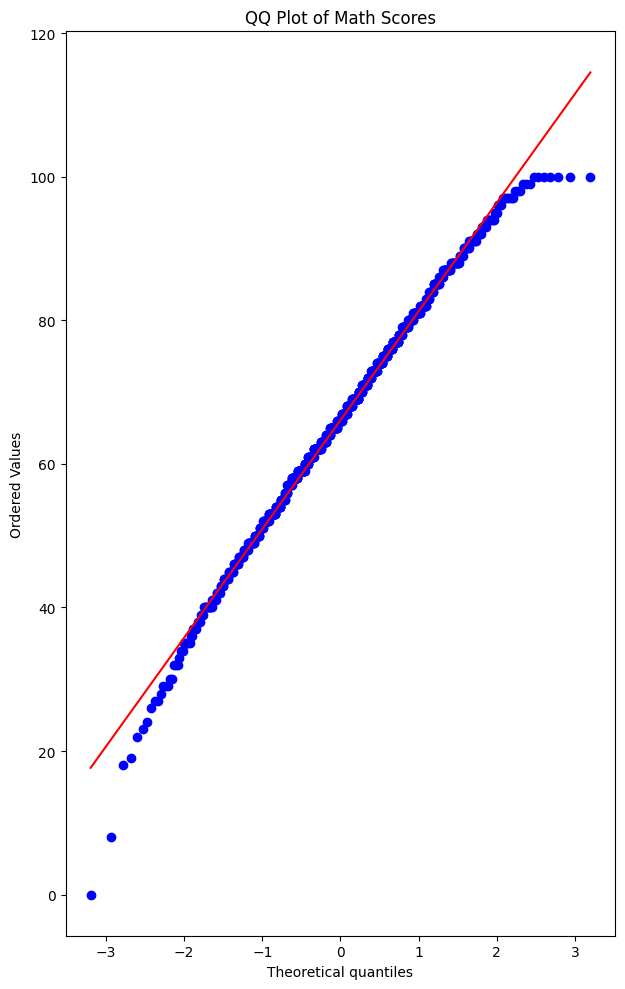

In [9]:
plt.figure(figsize=(12, 10))
# Extract Math_Score column
math_scores = data['math score']
# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(math_scores, dist="norm", plot=plt)
plt.title('QQ Plot of Math Scores')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

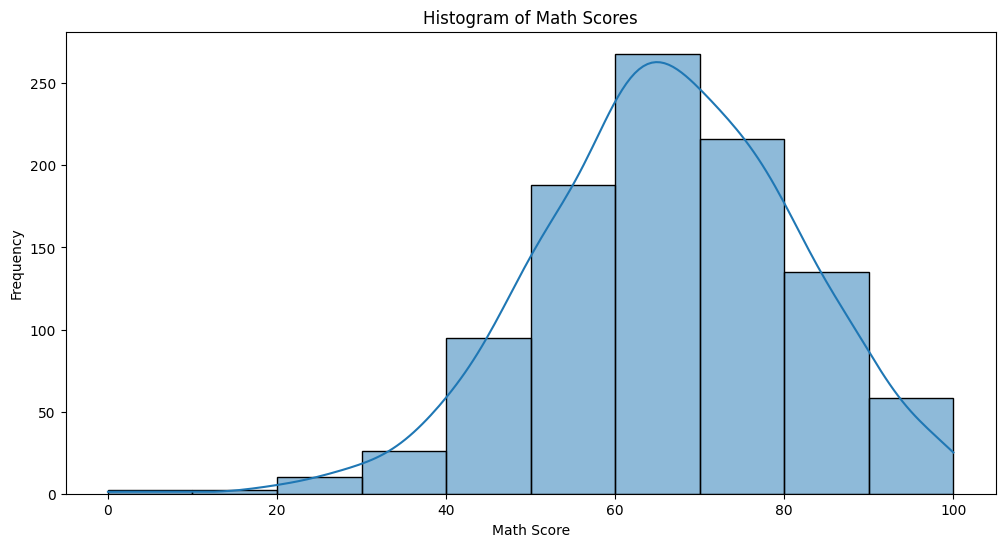

In [10]:
plt.figure(figsize=(12, 6))
# Histogram
sns.histplot(math_scores, bins=10, kde=True)
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

In [11]:
# Shapiro-Wilk test
statistic, p_value = stats.shapiro(math_scores)
print(f"Shapiro-Wilk Test for math Score: Statistic = {statistic:.4f}, p-value = {p_value:.4f}")

# Interpretation
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")


Shapiro-Wilk Test for math Score: Statistic = 0.9932, p-value = 0.0001
Reject the null hypothesis: The data is not normally distributed.


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [12]:
#Calculate z-scores for the 'Math_Score' column
data['math_Score_z'] = (data['math score'] - data['math score'].mean()) / data['math score'].std()

# Remove noise (keeping data within -1.96 to 1.96 z-score range)
cleaned_data = data[(data['math_Score_z'] >= -1.96) & (data['math_Score_z'] <= 1.96)]

# Print sizes of the original and cleaned DataFrames
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")


Original data size: (1000, 9)
Cleaned data size: (949, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

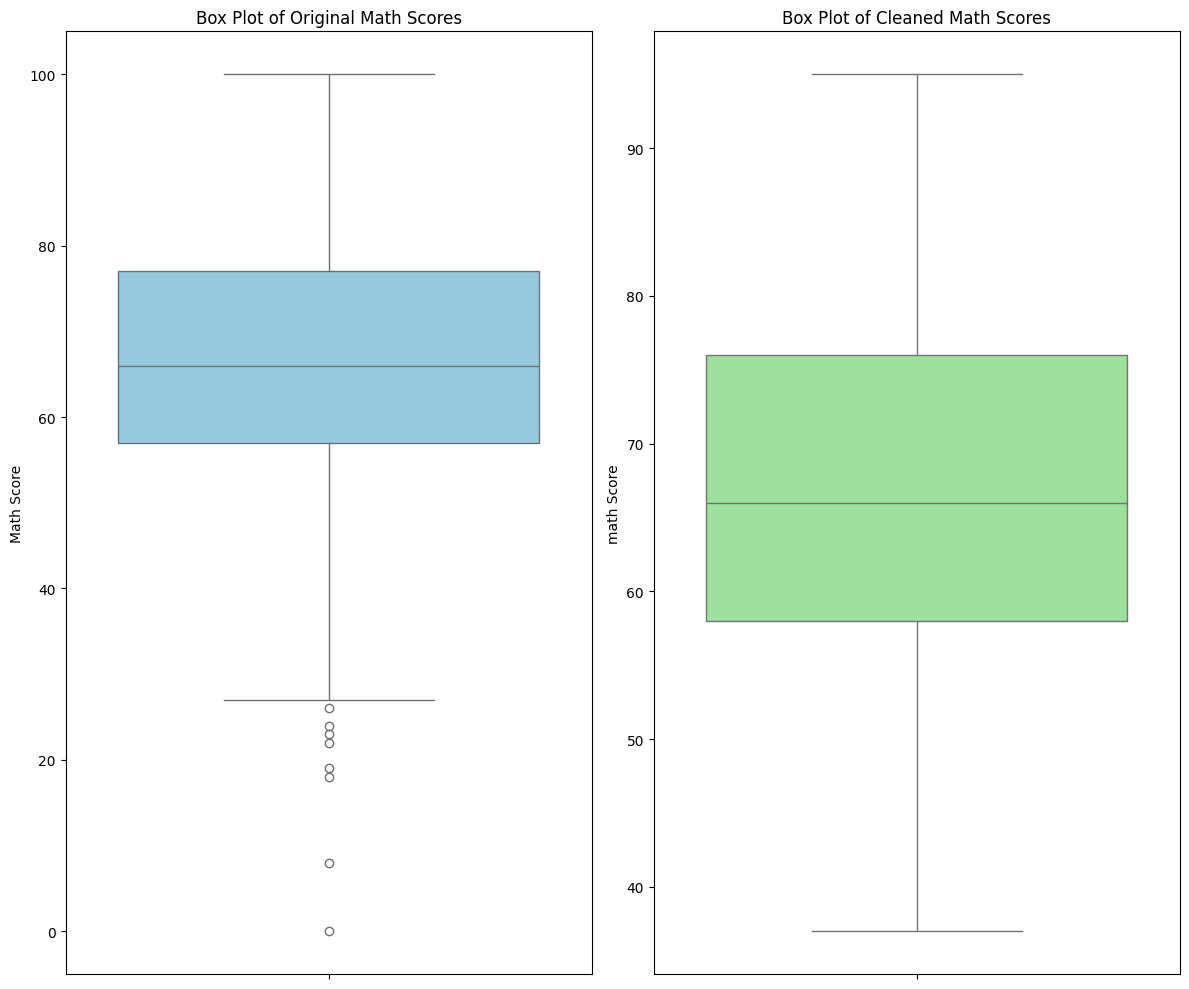

In [13]:
plt.figure(figsize=(12, 10))
# Box Plot for Original Data
plt.subplot(1, 2, 1)
sns.boxplot(y=data['math score'], color='skyblue')
plt.title('Box Plot of Original Math Scores')
plt.ylabel('Math Score')

# Box Plot for Cleaned Data
plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_data['math score'], color='lightgreen')
plt.title('Box Plot of Cleaned Math Scores')
plt.ylabel('math Score')

plt.tight_layout()
plt.show()



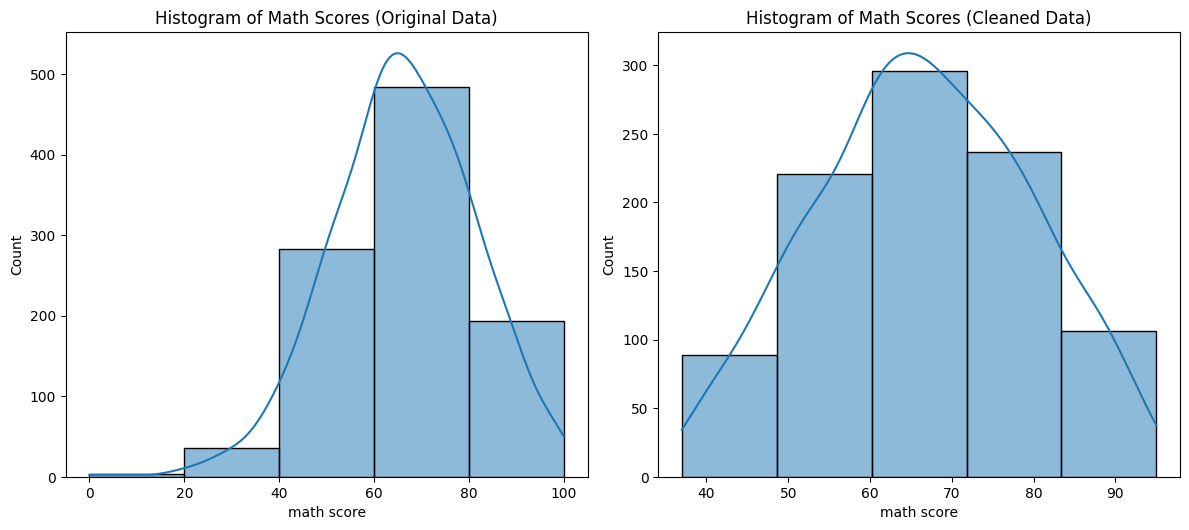

In [14]:
plt.figure(figsize=(12, 10))
# Histogram for Original Data
plt.subplot(2, 2, 3)
sns.histplot(data['math score'], bins=5, kde=True)  # Adjust this if needed
plt.title('Histogram of Math Scores (Original Data)')
# Histogram for Cleaned Data
plt.subplot(2, 2, 4)
sns.histplot(cleaned_data['math score'], bins=5, kde=True)  # Adjust this if needed
plt.title('Histogram of Math Scores (Cleaned Data)')

plt.tight_layout()
plt.show()

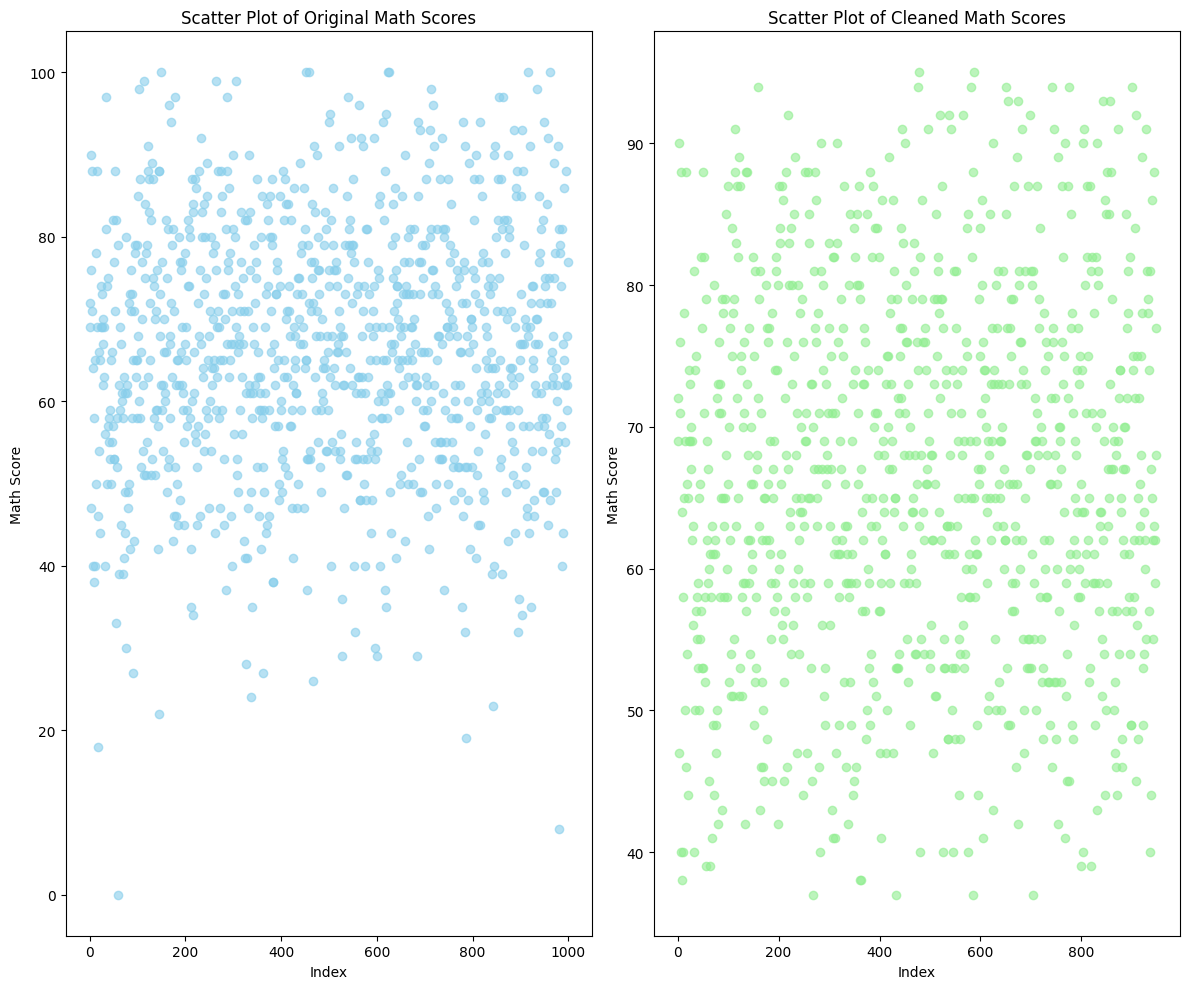

In [15]:
plt.figure(figsize=(12, 10))
# Scatter Plot for Original Data
plt.subplot(1, 2, 1)
plt.scatter(range(data.shape[0]), data['math score'], color='skyblue', alpha=0.6)
plt.title('Scatter Plot of Original Math Scores')
plt.xlabel('Index')
plt.ylabel('Math Score')

# Scatter Plot for Cleaned Data
plt.subplot(1, 2, 2)
plt.scatter(range(cleaned_data.shape[0]), cleaned_data['math score'], color='lightgreen', alpha=0.6)
plt.title('Scatter Plot of Cleaned Math Scores')
plt.xlabel('Index')
plt.ylabel('Math Score')

plt.tight_layout()
plt.show()

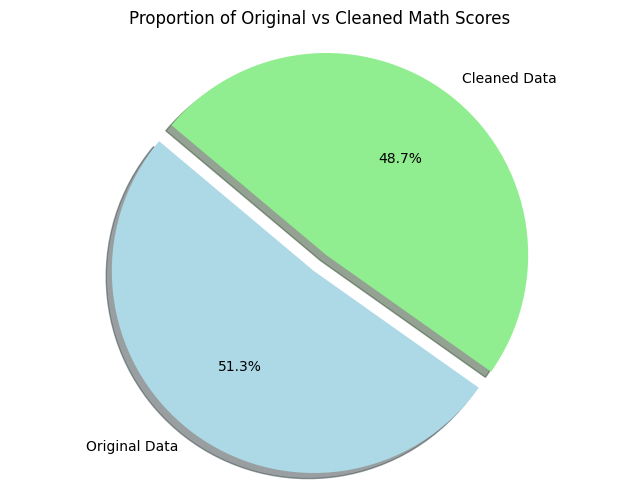

In [20]:
# Pie Chart
sizes = [data.shape[0], cleaned_data.shape[0]]
labels = ['Original Data', 'Cleaned Data']
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Original Data)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Original vs Cleaned Math Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


Scatter Plot for:
 math score vs writing score
 math score vs reading score

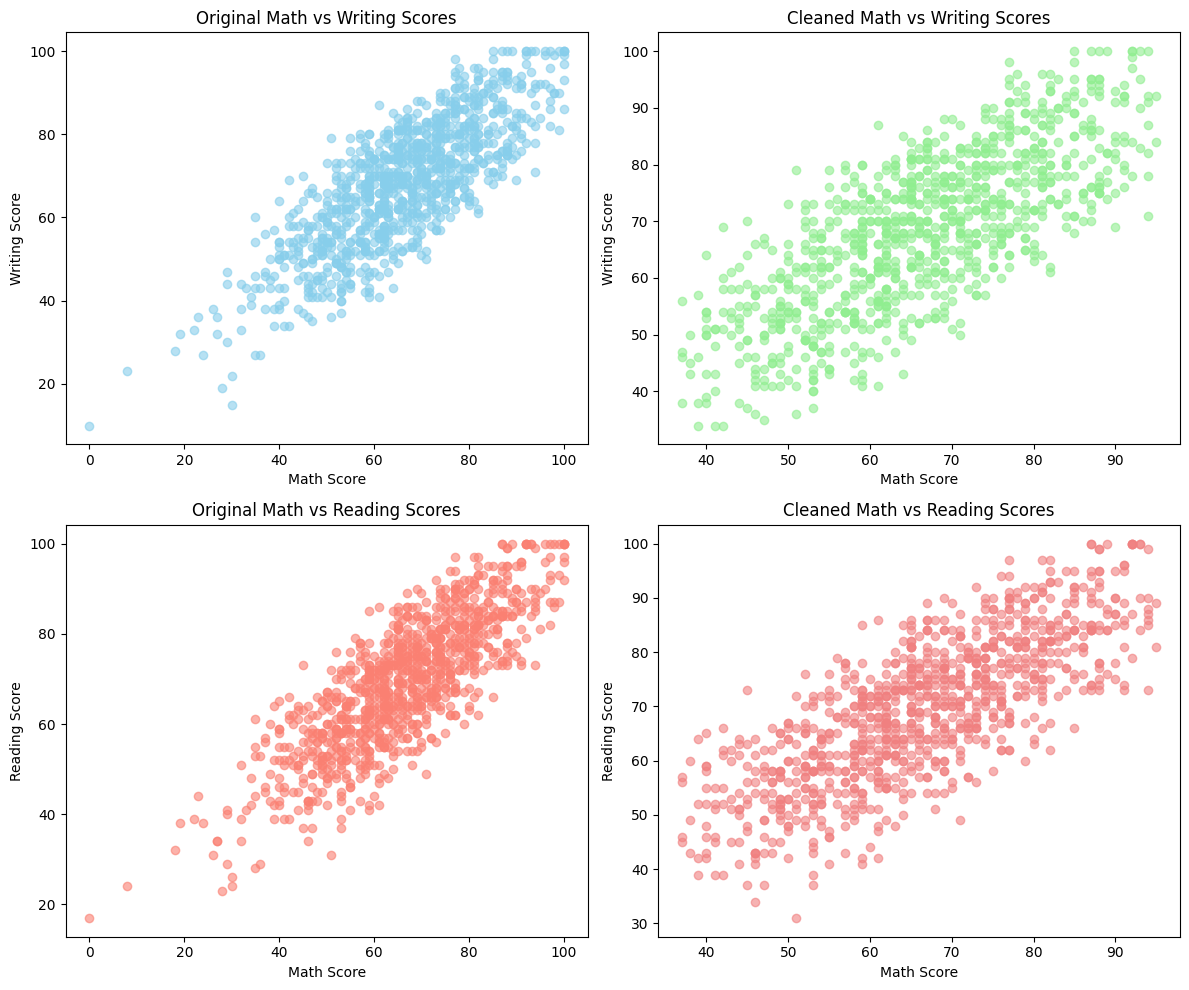

In [24]:
plt.figure(figsize=(12, 10))
# Scatter Plot for Original Data (Math vs Writing)
plt.subplot(2, 2, 1)
plt.scatter(data['math score'], data['writing score'], color='skyblue', alpha=0.6)
plt.title('Original Math vs Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

# Scatter Plot for Cleaned Data (Math vs Writing)
plt.subplot(2, 2, 2)
plt.scatter(cleaned_data['math score'], cleaned_data['writing score'], color='lightgreen', alpha=0.6)
plt.title('Cleaned Math vs Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

# Scatter Plot for Original Data (Math vs Reading)
plt.subplot(2, 2, 3)
plt.scatter(data['math score'], data['reading score'], color='salmon', alpha=0.6)
plt.title('Original Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

# Scatter Plot for Cleaned Data (Math vs Reading)
plt.subplot(2, 2, 4)
plt.scatter(cleaned_data['math score'], cleaned_data['reading score'], color='lightcoral', alpha=0.6)
plt.title('Cleaned Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.tight_layout()
plt.show()


# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [25]:
# Separate the cleaned data by gender
male_scores = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_scores = cleaned_data[cleaned_data['gender'] == 'female']['math score']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set significance level
alpha = 0.05

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between male and female math scores.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between male and female math scores.")

T-statistic: 4.519758747729613
P-value: 6.974001649329355e-06
Reject the null hypothesis: There is a significant difference between male and female math scores.


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [26]:
# Assuming cleaned_data is already defined and contains the necessary data
# Here we extract Math scores for each ethnicity group
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']
D = cleaned_data[cleaned_data['race/ethnicity'] == 'group D']['math score']
E = cleaned_data[cleaned_data['race/ethnicity'] == 'group E']['math score']

# Perform the one-way ANOVA test
f_statistic, p_value = stats.f_oneway(A, B, C, D, E)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

# Set significance level
alpha = 0.05  # Common choice for alpha

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Math scores across different ethnicities.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Math scores across different ethnicities.")


F-statistic: 12.005276516334701, p-value: 1.6083017880388605e-09
Reject the null hypothesis: There is a significant difference in Math scores across different ethnicities.


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

In [27]:
# Calculate mean and standard deviation for cleaned data
mean_math_score = cleaned_data['math score'].mean()
std_math_score = cleaned_data['math score'].std()
n = cleaned_data['math score'].count()

# Calculate standard error
standard_error = std_math_score / np.sqrt(n)

# Find critical t-value for 95% confidence interval
t_critical = stats.t.ppf(0.975, df=n-1)  # 0.975 for two-tailed test

# Calculate margin of error
margin_of_error = t_critical * standard_error

# Calculate confidence interval
confidence_interval = (mean_math_score - margin_of_error, mean_math_score + margin_of_error)

# Print results
print(f"Mean Math Score: {mean_math_score:.2f}")
print(f"95% Confidence Interval for Mean Math Score: {confidence_interval}")

Mean Math Score: 66.51
95% Confidence Interval for Mean Math Score: (np.float64(65.67208262986698), np.float64(67.34161600027001))
